# Loan Default Prediction - Part 16 - Neural Networks with Regularization

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 16 of the project: Neural Networks with Regularization.

In this part, I will add a hidden layer and try a few different regularization methods.

I will first load the normalized data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils
import project_keras_utils as keras_utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


## Adding Hidden Layers

I will base my implementation on the last part, but add some hidden layers.

In [3]:
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation

In [4]:
# Define parameters

n_features = X.shape[1]
n_epochs = 30
batch_size = 256
class_weight = {0: 1., 1: 10.}

First, I will add a hidden layer of 4 neurons.

In [5]:
# Build Keras model

inputs = Input(shape=(n_features,), name='input')
x = Dense(4, activation='relu')(inputs)
class_output = Dense(1, activation='sigmoid', name='class_output')(x)
clf = Model(inputs=inputs, outputs=class_output)

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adamax(lr=0.001),
            metrics=['binary_accuracy'])

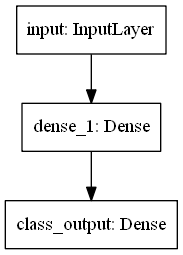

In [6]:
# Plot the model

from keras.utils import plot_model
plot_model(clf, to_file='model.png')

from IPython.display import Image
Image("model.png")

Epoch 1/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.2055 - binary_accuracy: 0.5779
Epoch 2/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1782 - binary_accuracy: 0.5700
Epoch 3/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1664 - binary_accuracy: 0.5782
Epoch 4/30
84376/84376 [==============================] - 10s 115us/step - loss: 1.1575 - binary_accuracy: 0.5879
Epoch 5/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1497 - binary_accuracy: 0.5922
Epoch 6/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1427 - binary_accuracy: 0.5914
Epoch 7/30
84376/84376 [==============================] - 10s 115us/step - loss: 1.1361 - binary_accuracy: 0.6036
Epoch 8/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1305 - binary_accuracy: 0.6092
Epoch 9/30
84376/84376 [==============================] - 10s 113us/step - loss: 1.1244 

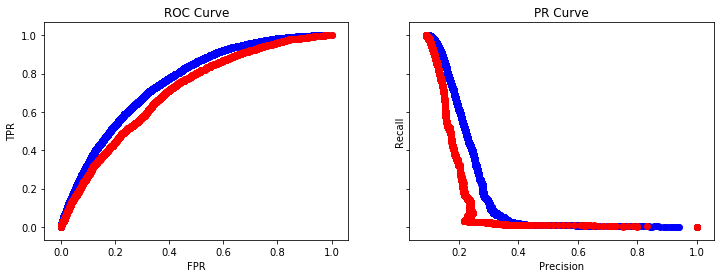

In [7]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

I got an ROCAUC of 0.707, similar to what I got with a single-layer perceptron. I'll try some other widths.

In [8]:
ks = [2, 4, 6, 8, 12, 16, 24, 32]

----- width = 2 -----
Epoch 1/30
84376/84376 [==============================] - 10s 121us/step - loss: 1.2546 - binary_accuracy: 0.5316
Epoch 2/30
84376/84376 [==============================] - 10s 121us/step - loss: 1.2267 - binary_accuracy: 0.5807
Epoch 3/30
84376/84376 [==============================] - 10s 121us/step - loss: 1.2129 - binary_accuracy: 0.6010
Epoch 4/30
84376/84376 [==============================] - 10s 117us/step - loss: 1.2015 - binary_accuracy: 0.6117
Epoch 5/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1922 - binary_accuracy: 0.6144
Epoch 6/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1839 - binary_accuracy: 0.6188
Epoch 7/30
84376/84376 [==============================] - 10s 115us/step - loss: 1.1767 - binary_accuracy: 0.6203
Epoch 8/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1707 - binary_accuracy: 0.6265
Epoch 9/30
84376/84376 [==============================] - 10s 116u

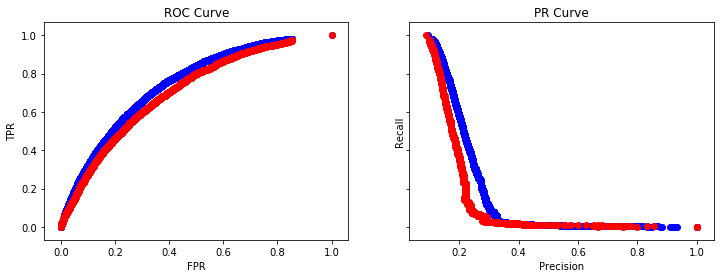

----- width = 4 -----
Epoch 1/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.2091 - binary_accuracy: 0.5508
Epoch 2/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.1753 - binary_accuracy: 0.5516
Epoch 3/30
84376/84376 [==============================] - 10s 117us/step - loss: 1.1614 - binary_accuracy: 0.5692
Epoch 4/30
84376/84376 [==============================] - 10s 117us/step - loss: 1.1504 - binary_accuracy: 0.5815
Epoch 5/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1418 - binary_accuracy: 0.5849
Epoch 6/30
84376/84376 [==============================] - 10s 117us/step - loss: 1.1349 - binary_accuracy: 0.60501s - loss: 1.1
Epoch 7/30
84376/84376 [==============================] - 10s 120us/step - loss: 1.1274 - binary_accuracy: 0.6131
Epoch 8/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.1216 - binary_accuracy: 0.6139
Epoch 9/30
84376/84376 [============================

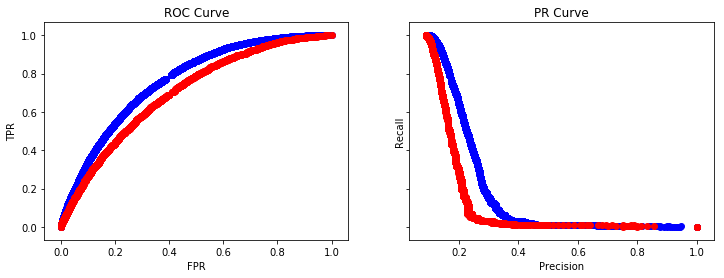

----- width = 6 -----
Epoch 1/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2294 - binary_accuracy: 0.5694
Epoch 2/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1853 - binary_accuracy: 0.5432
Epoch 3/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1683 - binary_accuracy: 0.5587
Epoch 4/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1539 - binary_accuracy: 0.5723
Epoch 5/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1430 - binary_accuracy: 0.5839
Epoch 6/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1325 - binary_accuracy: 0.5902
Epoch 7/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1233 - binary_accuracy: 0.6001
Epoch 8/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1173 - binary_accuracy: 0.6041
Epoch 9/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1

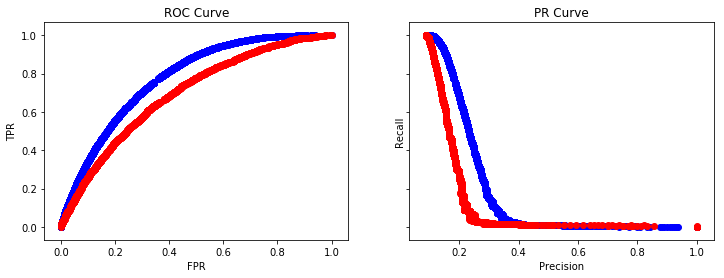

----- width = 8 -----
Epoch 1/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2050 - binary_accuracy: 0.5680
Epoch 2/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1737 - binary_accuracy: 0.5748
Epoch 3/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1583 - binary_accuracy: 0.5862
Epoch 4/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1475 - binary_accuracy: 0.5960
Epoch 5/30
84376/84376 [==============================] - 5s 59us/step - loss: 1.1369 - binary_accuracy: 0.6054
Epoch 6/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1283 - binary_accuracy: 0.6104
Epoch 7/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1221 - binary_accuracy: 0.6124
Epoch 8/30
84376/84376 [==============================] - 5s 59us/step - loss: 1.1154 - binary_accuracy: 0.6205
Epoch 9/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1

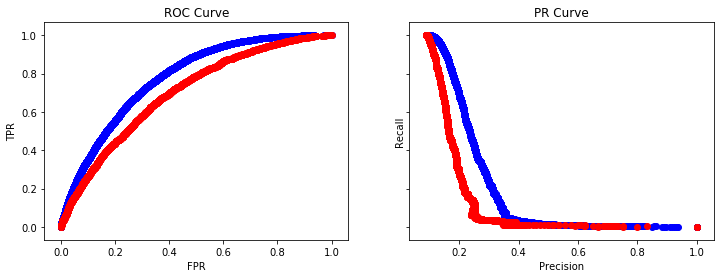

----- width = 12 -----
Epoch 1/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.2166 - binary_accuracy: 0.5453
Epoch 2/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1682 - binary_accuracy: 0.5761
Epoch 3/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1472 - binary_accuracy: 0.5919
Epoch 4/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1337 - binary_accuracy: 0.6017
Epoch 5/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.1218 - binary_accuracy: 0.6121
Epoch 6/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1104 - binary_accuracy: 0.6145
Epoch 7/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.1029 - binary_accuracy: 0.6218
Epoch 8/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.0946 - binary_accuracy: 0.6300
Epoch 9/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.

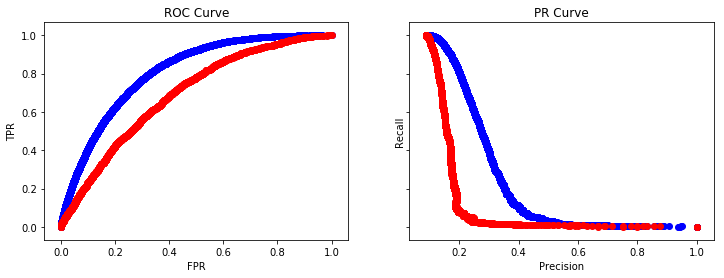

----- width = 16 -----
Epoch 1/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1977 - binary_accuracy: 0.5640
Epoch 2/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1595 - binary_accuracy: 0.5865
Epoch 3/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1408 - binary_accuracy: 0.6021
Epoch 4/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1268 - binary_accuracy: 0.6096
Epoch 5/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1140 - binary_accuracy: 0.6181
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1041 - binary_accuracy: 0.6255
Epoch 7/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.0957 - binary_accuracy: 0.6316
Epoch 8/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.0874 - binary_accuracy: 0.6357
Epoch 9/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.

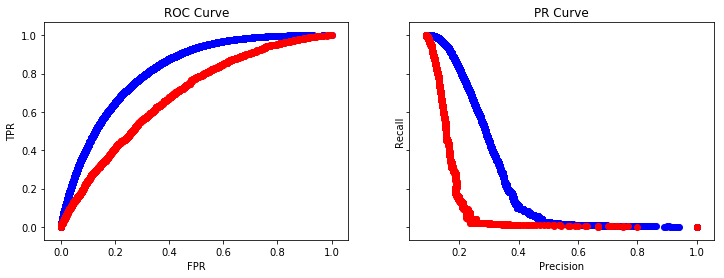

----- width = 24 -----
Epoch 1/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2157 - binary_accuracy: 0.5704
Epoch 2/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.1602 - binary_accuracy: 0.5928
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.1386 - binary_accuracy: 0.6061
Epoch 4/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.1205 - binary_accuracy: 0.6162
Epoch 5/30
84376/84376 [==============================] - 7s 80us/step - loss: 1.1074 - binary_accuracy: 0.6256
Epoch 6/30
84376/84376 [==============================] - 7s 84us/step - loss: 1.0940 - binary_accuracy: 0.6337
Epoch 7/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.0828 - binary_accuracy: 0.6391
Epoch 8/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.0727 - binary_accuracy: 0.6423
Epoch 9/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.

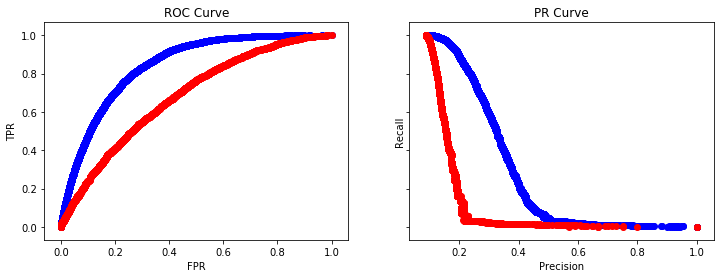

----- width = 32 -----
Epoch 1/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.2034 - binary_accuracy: 0.5707
Epoch 2/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1510 - binary_accuracy: 0.6031
Epoch 3/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.1308 - binary_accuracy: 0.6132
Epoch 4/30
84376/84376 [==============================] - 6s 77us/step - loss: 1.1140 - binary_accuracy: 0.6230
Epoch 5/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.0992 - binary_accuracy: 0.6300
Epoch 6/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.0872 - binary_accuracy: 0.6411
Epoch 7/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.0740 - binary_accuracy: 0.6490
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0647 - binary_accuracy: 0.6490
Epoch 9/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.

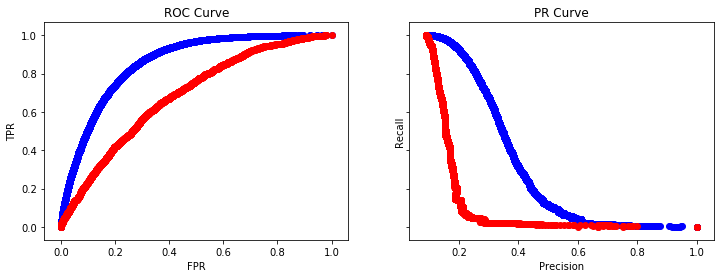

In [9]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- width = %d -----' % k)

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(k, activation='relu')(inputs)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)
    

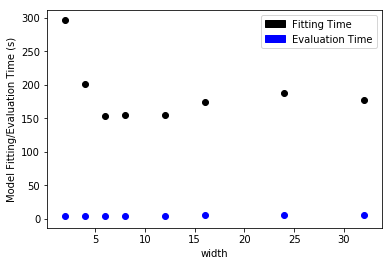

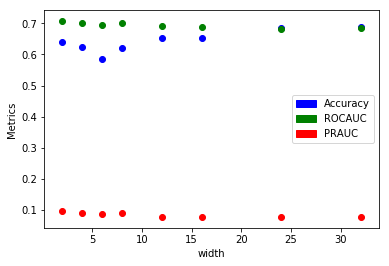

   0_width  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0        2    0.640531  0.707894  0.096087  296.254145     4.647579
1        4    0.623323  0.702338  0.089069  201.842410     3.531587
2        6    0.586395  0.694770  0.085553  153.307811     3.597826
3        8    0.621616  0.701677  0.091718  154.599772     3.672512
4       12    0.651576  0.691418  0.076713  155.498672     3.780747
5       16    0.651766  0.686890  0.076773  174.386272     5.730269
6       24    0.685992  0.682701  0.076475  187.756714     5.591465
7       32    0.689073  0.686152  0.078392  177.452427     5.619152


         0_width  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count   8.000000    8.000000  8.000000  8.000000    8.000000     8.000000
mean   13.000000    0.643784  0.694230  0.083847  187.637278     4.521392
std    10.474459    0.034166  0.009009  0.007810   47.179934     0.994936
min     2.000000    0.586395  0.682701  0.076475  153.307811     3.531587
25%     5.500000

In [10]:
utils.plot_metrics(ks, 'width', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

As the width of the hidden layer increases, ROCAUCs on the training set keep improving to up to 0.856, but ROCAUCs on the validation set worsened, indicating overfitting.

## Regularization

Let's see if adding regularization helps overcoming the overfitting problem. I will try L2 regularization first.

In [11]:
Cs = [10., 1., 0.1, 0.01, 1e-3, 1e-4]

----- C = 10.000000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 76us/step - loss: 36.7614 - binary_accuracy: 0.5416
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2409 - binary_accuracy: 0.5695
Epoch 3/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2418 - binary_accuracy: 0.5712
Epoch 4/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.2434 - binary_accuracy: 0.5708
Epoch 5/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.2504 - binary_accuracy: 0.5760
Epoch 6/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.2557 - binary_accuracy: 0.5692
Epoch 7/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.2575 - binary_accuracy: 0.5670
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.2576 - binary_accuracy: 0.5623
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss

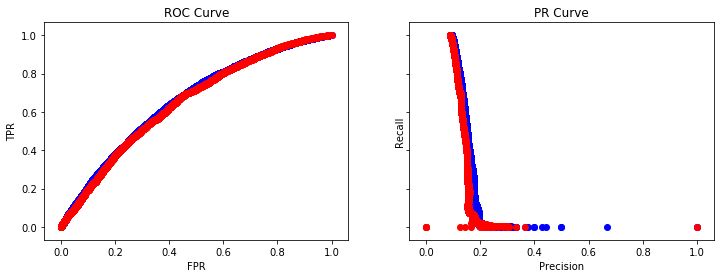

----- C = 1.000000 -----
Epoch 1/30
84376/84376 [==============================] - 5s 64us/step - loss: 5.3246 - binary_accuracy: 0.5622
Epoch 2/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.2291 - binary_accuracy: 0.5372
Epoch 3/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.2283 - binary_accuracy: 0.5499
Epoch 4/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2246 - binary_accuracy: 0.5521
Epoch 5/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2263 - binary_accuracy: 0.5525
Epoch 6/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2254 - binary_accuracy: 0.5594
Epoch 7/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.2244 - binary_accuracy: 0.5599
Epoch 8/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.2245 - binary_accuracy: 0.5603
Epoch 9/30
84376/84376 [==============================] - 5s 61us/step - loss: 

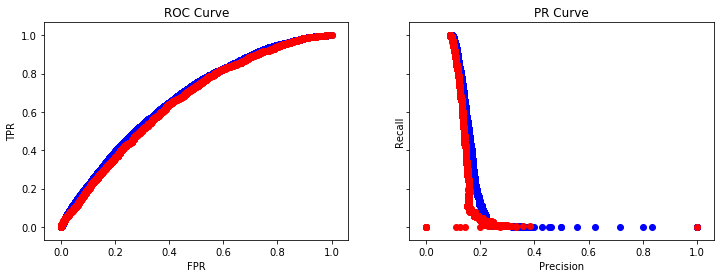

----- C = 0.100000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 65us/step - loss: 2.1564 - binary_accuracy: 0.5602
Epoch 2/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.2711 - binary_accuracy: 0.5712
Epoch 3/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.2144 - binary_accuracy: 0.5719
Epoch 4/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.2008 - binary_accuracy: 0.5767
Epoch 5/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1952 - binary_accuracy: 0.5806
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1911 - binary_accuracy: 0.5827
Epoch 7/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1927 - binary_accuracy: 0.5810
Epoch 8/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1893 - binary_accuracy: 0.5878
Epoch 9/30
84376/84376 [==============================] - 6s 66us/step - loss: 

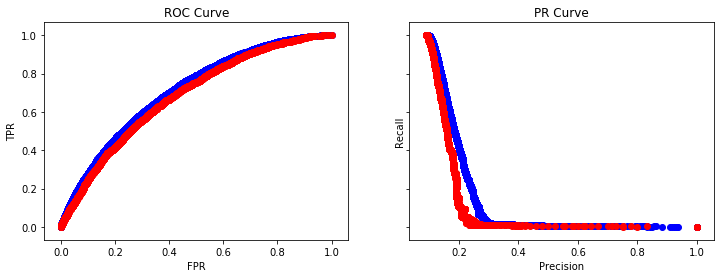

----- C = 0.010000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.4817 - binary_accuracy: 0.5721
Epoch 2/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.3118 - binary_accuracy: 0.5949: 0s - loss: 1.3155 - binary_accuracy: 
Epoch 3/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2534 - binary_accuracy: 0.6042
Epoch 4/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.2187 - binary_accuracy: 0.6065
Epoch 5/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1972 - binary_accuracy: 0.6129
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1835 - binary_accuracy: 0.6134
Epoch 7/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1716 - binary_accuracy: 0.6179
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1629 - binary_accuracy: 0.6237
Epoch 9/30
84376/84376 [================

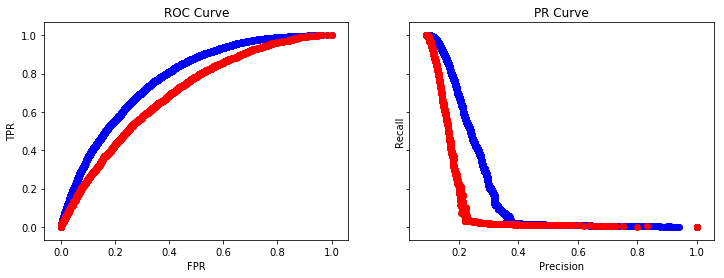

----- C = 0.001000 -----
Epoch 1/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.2610 - binary_accuracy: 0.5680
Epoch 2/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1971 - binary_accuracy: 0.5928
Epoch 3/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1714 - binary_accuracy: 0.6131
Epoch 4/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1528 - binary_accuracy: 0.6165
Epoch 5/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1392 - binary_accuracy: 0.6290
Epoch 6/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1278 - binary_accuracy: 0.6333
Epoch 7/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1153 - binary_accuracy: 0.6401
Epoch 8/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1077 - binary_accuracy: 0.6457
Epoch 9/30
84376/84376 [==============================] - 5s 62us/step - loss: 

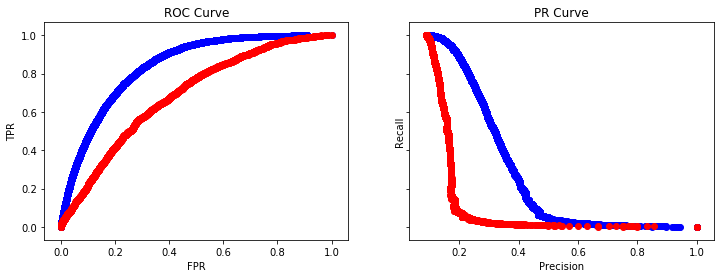

----- C = 0.000100 -----
Epoch 1/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2127 - binary_accuracy: 0.5812
Epoch 2/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1581 - binary_accuracy: 0.6011
Epoch 3/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1337 - binary_accuracy: 0.6145
Epoch 4/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1169 - binary_accuracy: 0.6307
Epoch 5/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1029 - binary_accuracy: 0.6321
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.0915 - binary_accuracy: 0.6444
Epoch 7/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.0808 - binary_accuracy: 0.6492
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.0686 - binary_accuracy: 0.6510
Epoch 9/30
84376/84376 [==============================] - 5s 63us/step - loss: 

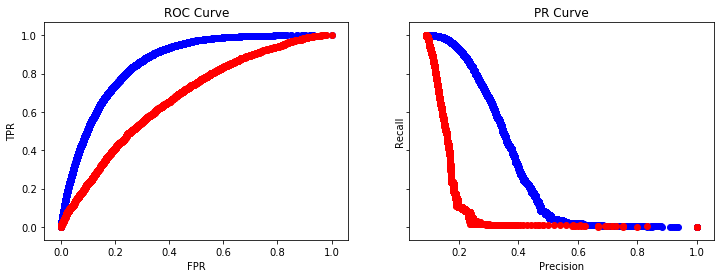

In [12]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for C in Cs:
    print('----- C = %f -----' % C)

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(C))(inputs)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

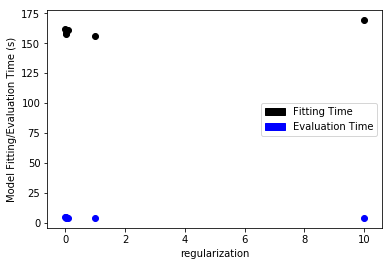

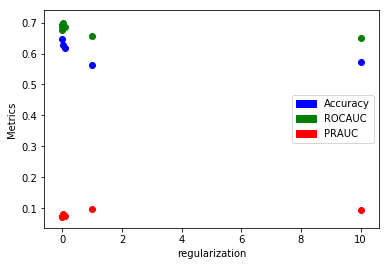

   0_regularization  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0           10.0000    0.573122  0.650047  0.094734  169.192040     4.132628
1            1.0000    0.563641  0.657564  0.097886  155.913532     4.178376
2            0.1000    0.619199  0.684495  0.073939  160.656166     4.275364
3            0.0100    0.628538  0.697804  0.081293  158.776891     4.263343
4            0.0010    0.648353  0.687526  0.074030  157.874793     4.477248
5            0.0001    0.693671  0.677443  0.071529  161.693721     4.313703


       0_regularization  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  \
count          6.000000    6.000000  6.000000  6.000000    6.000000   
mean           1.851850    0.621087  0.675813  0.082235  160.684524   
std            4.010836    0.048315  0.018416  0.011427    4.640973   
min            0.000100    0.563641  0.650047  0.071529  155.913532   
25%            0.003250    0.584641  0.662534  0.073962  158.100317   
50%            0.055000    0.6238

In [13]:
utils.plot_metrics(Cs, 'regularization', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

When a large enough regularization is applied, the ROC curves of the training and the validation sets are close, indicating that overfitting is reduced. The best ROCAUC achieved here is 0.698, better than the 0.686 obtained previously.

Next, I will try L1 regularization.

----- C = 10.000000 -----
Epoch 1/30
84376/84376 [==============================] - 5s 63us/step - loss: 1098.2212 - binary_accuracy: 0.1776
Epoch 2/30
84376/84376 [==============================] - 5s 64us/step - loss: 69.6863 - binary_accuracy: 0.0939
Epoch 3/30
84376/84376 [==============================] - 5s 64us/step - loss: 69.2206 - binary_accuracy: 0.0939
Epoch 4/30
84376/84376 [==============================] - 5s 64us/step - loss: 69.0547 - binary_accuracy: 0.0939
Epoch 5/30
84376/84376 [==============================] - 5s 63us/step - loss: 68.9333 - binary_accuracy: 0.0939
Epoch 6/30
84376/84376 [==============================] - 5s 64us/step - loss: 68.8137 - binary_accuracy: 0.0939
Epoch 7/30
84376/84376 [==============================] - 5s 64us/step - loss: 68.7644 - binary_accuracy: 0.0939
Epoch 8/30
84376/84376 [==============================] - 5s 63us/step - loss: 68.7162 - binary_accuracy: 0.0939
Epoch 9/30
84376/84376 [==============================] - 5s 63us/st

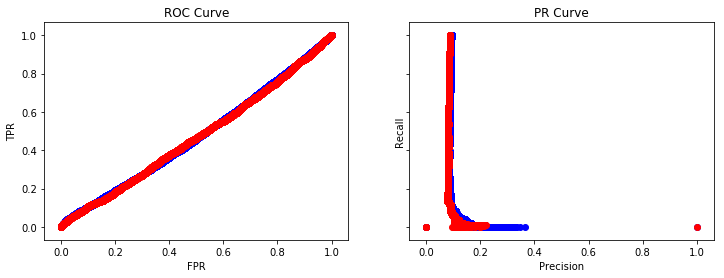

----- C = 1.000000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 66us/step - loss: 112.1546 - binary_accuracy: 0.1813
Epoch 2/30
84376/84376 [==============================] - 5s 57us/step - loss: 7.9431 - binary_accuracy: 0.0939
Epoch 3/30
84376/84376 [==============================] - 5s 63us/step - loss: 7.8743 - binary_accuracy: 0.0939
Epoch 4/30
84376/84376 [==============================] - 5s 64us/step - loss: 7.8403 - binary_accuracy: 0.0939
Epoch 5/30
84376/84376 [==============================] - 5s 63us/step - loss: 7.8251 - binary_accuracy: 0.0939
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 7.8068 - binary_accuracy: 0.0939
Epoch 7/30
84376/84376 [==============================] - 5s 63us/step - loss: 7.7980 - binary_accuracy: 0.0939
Epoch 8/30
84376/84376 [==============================] - 5s 65us/step - loss: 7.7899 - binary_accuracy: 0.0939
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss

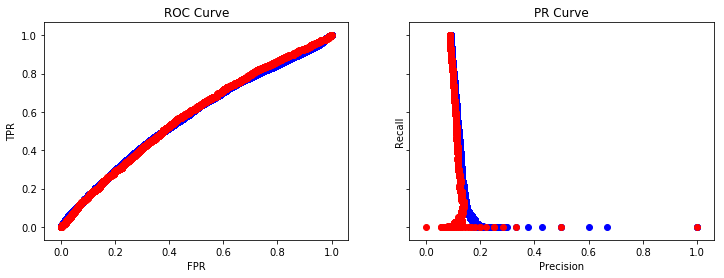

----- C = 0.100000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 67us/step - loss: 13.1795 - binary_accuracy: 0.4540
Epoch 2/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.8757 - binary_accuracy: 0.4212
Epoch 3/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.8717 - binary_accuracy: 0.4137
Epoch 4/30
84376/84376 [==============================] - 5s 58us/step - loss: 1.8697 - binary_accuracy: 0.3852
Epoch 5/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.8673 - binary_accuracy: 0.4703
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.8637 - binary_accuracy: 0.4597
Epoch 7/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.8615 - binary_accuracy: 0.4714
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.8602 - binary_accuracy: 0.4708
Epoch 9/30
84376/84376 [==============================] - 5s 63us/step - loss:

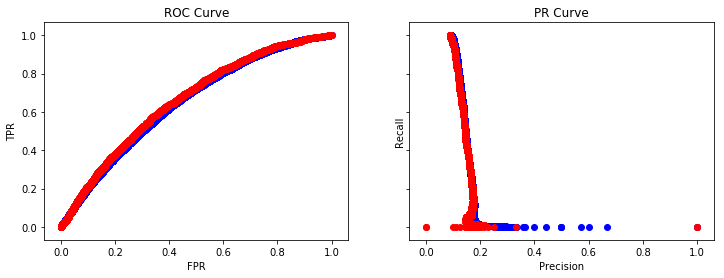

----- C = 0.010000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 68us/step - loss: 3.6294 - binary_accuracy: 0.5520
Epoch 2/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.3678 - binary_accuracy: 0.5807
Epoch 3/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.3162 - binary_accuracy: 0.5870
Epoch 4/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.3019 - binary_accuracy: 0.5931
Epoch 5/30
84376/84376 [==============================] - 5s 60us/step - loss: 1.2939 - binary_accuracy: 0.5883
Epoch 6/30
84376/84376 [==============================] - 5s 61us/step - loss: 1.2924 - binary_accuracy: 0.5903
Epoch 7/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.2938 - binary_accuracy: 0.5864
Epoch 8/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.2868 - binary_accuracy: 0.5932
Epoch 9/30
84376/84376 [==============================] - 6s 65us/step - loss: 

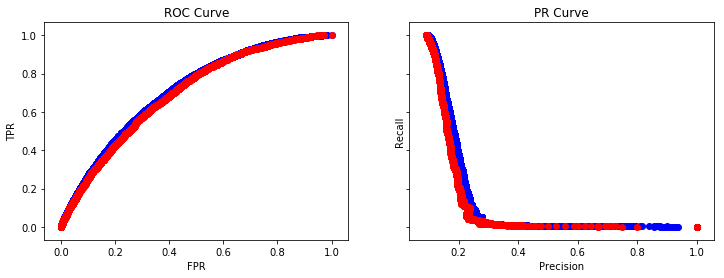

----- C = 0.001000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 69us/step - loss: 2.0298 - binary_accuracy: 0.5715
Epoch 2/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.6239 - binary_accuracy: 0.5877
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.4734 - binary_accuracy: 0.5983
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3852 - binary_accuracy: 0.6029
Epoch 5/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.3297 - binary_accuracy: 0.6031
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2909 - binary_accuracy: 0.6069
Epoch 7/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.2608 - binary_accuracy: 0.6017
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2408 - binary_accuracy: 0.6081
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

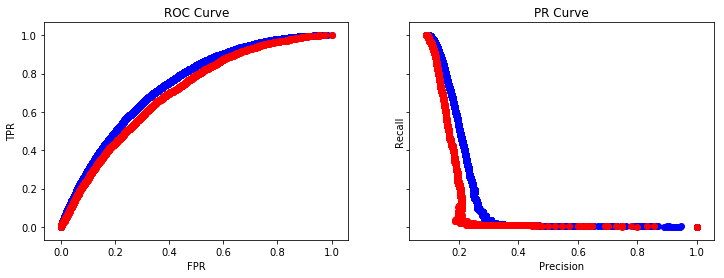

----- C = 0.000100 -----
Epoch 1/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.3266 - binary_accuracy: 0.5725
Epoch 2/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.2579 - binary_accuracy: 0.5942
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.2254 - binary_accuracy: 0.6118
Epoch 4/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.2042 - binary_accuracy: 0.6235
Epoch 5/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.1870 - binary_accuracy: 0.6246
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1735 - binary_accuracy: 0.6340
Epoch 7/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1620 - binary_accuracy: 0.6398
Epoch 8/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1521 - binary_accuracy: 0.6419
Epoch 9/30
84376/84376 [==============================] - 6s 68us/step - loss: 

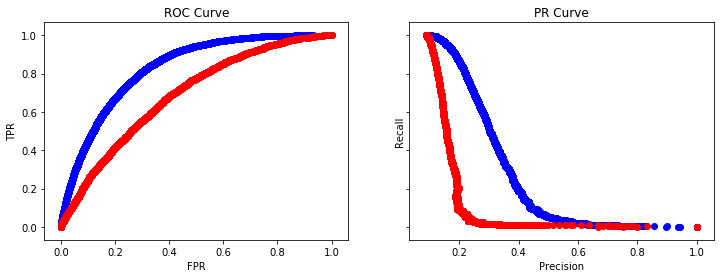

In [14]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for C in Cs:
    print('----- C = %f -----' % C)

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1(C))(inputs)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

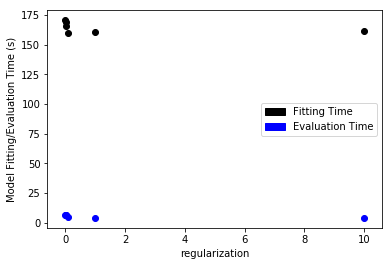

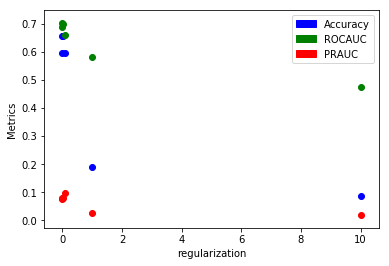

   0_regularization  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0           10.0000    0.088173  0.473231  0.018382  161.246741     4.269896
1            1.0000    0.188860  0.580101  0.025508  160.699447     4.419302
2            0.1000    0.596113  0.661450  0.098076  159.580043     4.477287
3            0.0100    0.657170  0.697665  0.079858  165.479102     6.390084
4            0.0010    0.597156  0.703574  0.079468  168.622121     6.856458
5            0.0001    0.654942  0.688630  0.076598  170.429839     6.541090


       0_regularization  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  \
count          6.000000    6.000000  6.000000  6.000000    6.000000   
mean           1.851850    0.463735  0.634108  0.062982  164.342882   
std            4.010836    0.255306  0.090976  0.032763    4.521046   
min            0.000100    0.088173  0.473231  0.018382  159.580043   
25%            0.003250    0.290673  0.600438  0.038281  160.836271   
50%            0.055000    0.5966

In [15]:
utils.plot_metrics(Cs, 'regularization', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best result with ROCAUC = 0.703 is better than that of L2 regularization.

## Dropout

Another regularization technique to prevent overfitting in a neural network is to add a Dropout layer. It randomly drops a portion of units during training to prevent certain neurons from becoming dominant in the network.

In [16]:
Cs = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

----- C = 0.010000 -----
Epoch 1/30
84376/84376 [==============================] - 7s 77us/step - loss: 1.2087 - binary_accuracy: 0.5722
Epoch 2/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1540 - binary_accuracy: 0.5955
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.1322 - binary_accuracy: 0.6105
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1123 - binary_accuracy: 0.6191
Epoch 5/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.0998 - binary_accuracy: 0.6258
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0869 - binary_accuracy: 0.6354
Epoch 7/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.0753 - binary_accuracy: 0.6424
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0645 - binary_accuracy: 0.6471
Epoch 9/30
84376/84376 [==============================] - 6s 70us/step - loss: 

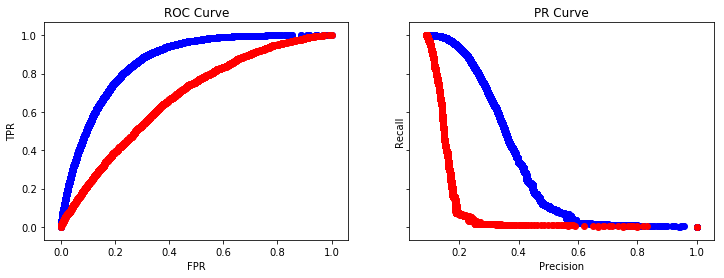

----- C = 0.050000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.2142 - binary_accuracy: 0.5615
Epoch 2/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1583 - binary_accuracy: 0.5856
Epoch 3/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1359 - binary_accuracy: 0.6017
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1235 - binary_accuracy: 0.6139
Epoch 5/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1050 - binary_accuracy: 0.6222
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0927 - binary_accuracy: 0.6295
Epoch 7/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0834 - binary_accuracy: 0.6344
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.0736 - binary_accuracy: 0.6415
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

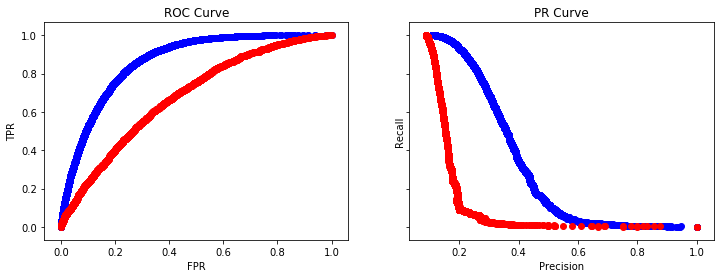

----- C = 0.100000 -----
Epoch 1/30
84376/84376 [==============================] - 7s 78us/step - loss: 1.2207 - binary_accuracy: 0.5747
Epoch 2/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.1624 - binary_accuracy: 0.5916
Epoch 3/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.1412 - binary_accuracy: 0.6027
Epoch 4/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.1257 - binary_accuracy: 0.6141
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1094 - binary_accuracy: 0.6189
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1001 - binary_accuracy: 0.6299
Epoch 7/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0862 - binary_accuracy: 0.6341
Epoch 8/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.0778 - binary_accuracy: 0.6418
Epoch 9/30
84376/84376 [==============================] - 6s 69us/step - loss: 

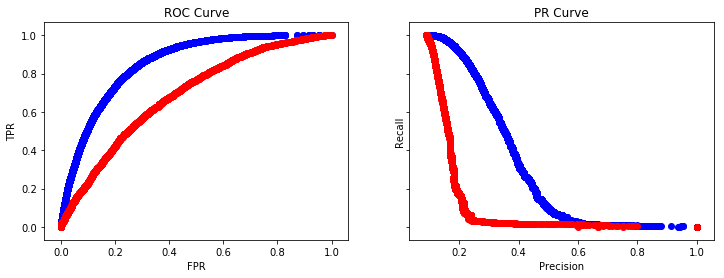

----- C = 0.200000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2231 - binary_accuracy: 0.5634
Epoch 2/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.1734 - binary_accuracy: 0.5807
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1541 - binary_accuracy: 0.5932
Epoch 4/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.1392 - binary_accuracy: 0.5980
Epoch 5/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1243 - binary_accuracy: 0.6069
Epoch 6/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1138 - binary_accuracy: 0.6129
Epoch 7/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.1060 - binary_accuracy: 0.6225
Epoch 8/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.0992 - binary_accuracy: 0.6255
Epoch 9/30
84376/84376 [==============================] - 6s 68us/step - loss: 

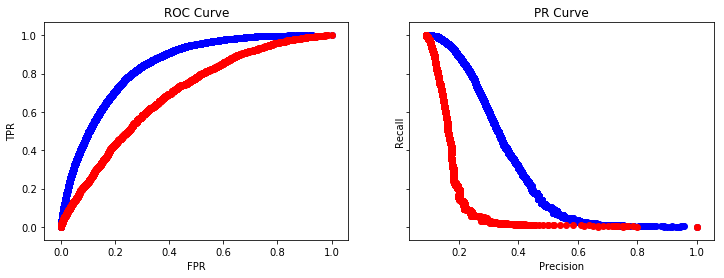

----- C = 0.300000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.2326 - binary_accuracy: 0.5610
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1812 - binary_accuracy: 0.5828
Epoch 3/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1595 - binary_accuracy: 0.5947
Epoch 4/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1503 - binary_accuracy: 0.5999
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1373 - binary_accuracy: 0.6055
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1268 - binary_accuracy: 0.6172
Epoch 7/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1180 - binary_accuracy: 0.6206
Epoch 8/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1136 - binary_accuracy: 0.6214
Epoch 9/30
84376/84376 [==============================] - 6s 66us/step - loss: 

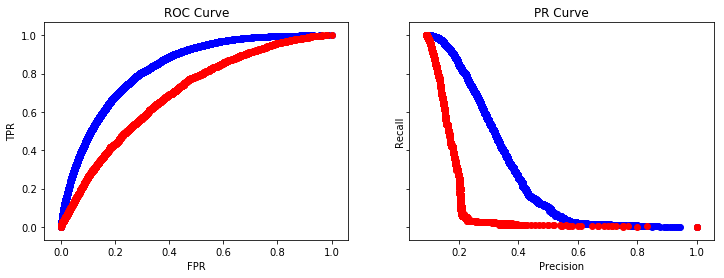

----- C = 0.400000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.2355 - binary_accuracy: 0.5591
Epoch 2/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1853 - binary_accuracy: 0.5720
Epoch 3/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.1695 - binary_accuracy: 0.5862
Epoch 4/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1603 - binary_accuracy: 0.5905
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1489 - binary_accuracy: 0.5979
Epoch 6/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1422 - binary_accuracy: 0.6029
Epoch 7/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.1333 - binary_accuracy: 0.6091
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1248 - binary_accuracy: 0.6167
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

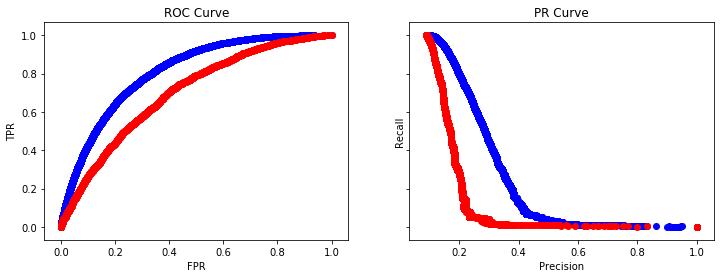

----- C = 0.500000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 77us/step - loss: 1.2555 - binary_accuracy: 0.5461
Epoch 2/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.1944 - binary_accuracy: 0.5632
Epoch 3/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1804 - binary_accuracy: 0.5698
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1691 - binary_accuracy: 0.5803
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1595 - binary_accuracy: 0.5828
Epoch 6/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.1539 - binary_accuracy: 0.5864
Epoch 7/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1478 - binary_accuracy: 0.5944
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1385 - binary_accuracy: 0.6056
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

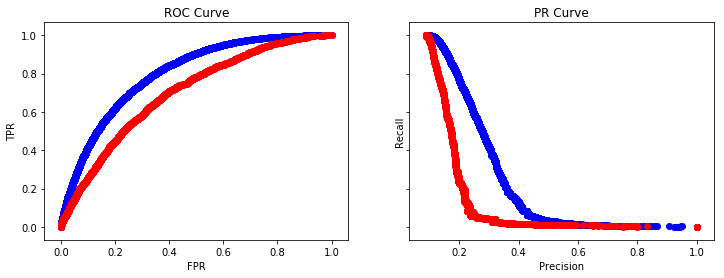

----- C = 0.600000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.2873 - binary_accuracy: 0.5448
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2120 - binary_accuracy: 0.5398
Epoch 3/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.1974 - binary_accuracy: 0.5509
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1883 - binary_accuracy: 0.5526
Epoch 5/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.1778 - binary_accuracy: 0.5658
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1735 - binary_accuracy: 0.5661
Epoch 7/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1635 - binary_accuracy: 0.5726
Epoch 8/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1657 - binary_accuracy: 0.5780
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

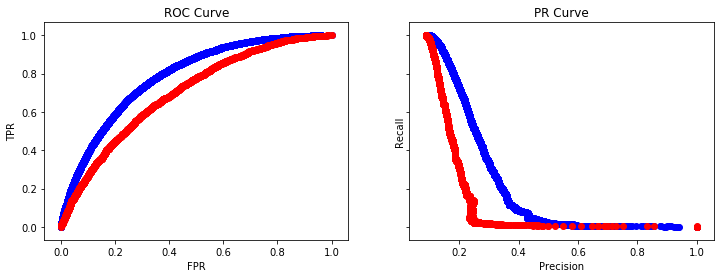

----- C = 0.700000 -----
Epoch 1/30
84376/84376 [==============================] - 7s 79us/step - loss: 1.3022 - binary_accuracy: 0.5509
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2231 - binary_accuracy: 0.5564
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.2142 - binary_accuracy: 0.5199
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2021 - binary_accuracy: 0.5154
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1926 - binary_accuracy: 0.5157
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1874 - binary_accuracy: 0.5168
Epoch 7/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1852 - binary_accuracy: 0.5290
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1776 - binary_accuracy: 0.5302
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

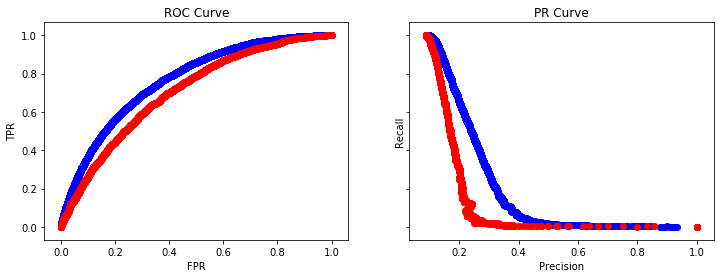

----- C = 0.800000 -----
Epoch 1/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.3680 - binary_accuracy: 0.5144
Epoch 2/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.2462 - binary_accuracy: 0.4822
Epoch 3/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.2324 - binary_accuracy: 0.4762
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2207 - binary_accuracy: 0.4772
Epoch 5/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2153 - binary_accuracy: 0.4791
Epoch 6/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2113 - binary_accuracy: 0.4704
Epoch 7/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2106 - binary_accuracy: 0.4783
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2018 - binary_accuracy: 0.4856
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 

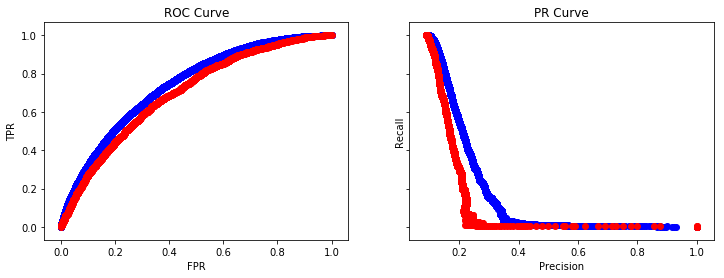

In [17]:
from keras.layers import Dropout

fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for C in Cs:
    print('----- C = %f -----' % C)

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(32, activation='relu')(inputs)
    x = Dropout(C)(x)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

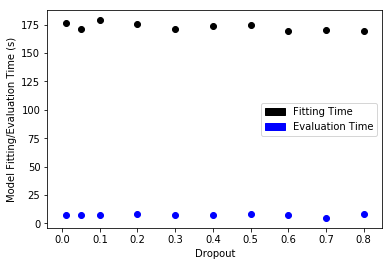

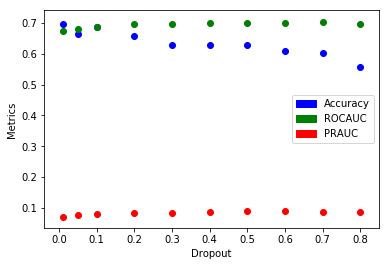

   0_Dropout  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0       0.01    0.695615  0.675610  0.069459  176.851909     7.292794
1       0.05    0.663807  0.679857  0.075334  171.068483     7.326542
2       0.10    0.688836  0.688486  0.081241  178.848706     7.871368
3       0.20    0.659256  0.696367  0.082926  175.644014     8.198021
4       0.30    0.628490  0.697025  0.081967  171.392426     7.638032
5       0.40    0.629960  0.701015  0.087194  173.458651     7.565405
6       0.50    0.630055  0.701092  0.090367  174.341268     8.006442
7       0.60    0.610761  0.699939  0.088362  169.385907     7.334343
8       0.70    0.601896  0.704538  0.087005  170.301326     5.054384
9       0.80    0.558000  0.698431  0.084677  169.299548     8.059176


       0_Dropout  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  10.000000   10.000000  10.000000  10.000000   10.000000    10.000000
mean    0.366000    0.636667   0.694236   0.082853  173.059224     7.434651


In [18]:
utils.plot_metrics(Cs, 'Dropout', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best ROCAUC I got is 0.705, from the Dropout rate of 0.7.

## Combined Regularizations

I will generate some random combinations of L1, L2, and Dropout rate to test the effects.

----- L1 = 0.000125, L2 = 0.001696, Dropout = 0.759233 -----
Epoch 1/30
84376/84376 [==============================] - 7s 78us/step - loss: 1.5415 - binary_accuracy: 0.4866
Epoch 2/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.4151 - binary_accuracy: 0.4616
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.3844 - binary_accuracy: 0.4572
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3617 - binary_accuracy: 0.5163
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.3391 - binary_accuracy: 0.5518
Epoch 6/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.3231 - binary_accuracy: 0.5605
Epoch 7/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.3106 - binary_accuracy: 0.5666
Epoch 8/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2964 - binary_accuracy: 0.5709
Epoch 9/30
84376/84376 [===================

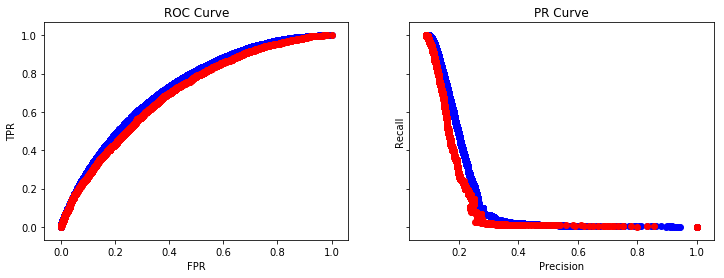

----- L1 = 0.000620, L2 = 0.018616, Dropout = 0.785857 -----
Epoch 1/30
84376/84376 [==============================] - 7s 79us/step - loss: 2.1677 - binary_accuracy: 0.5324
Epoch 2/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.6825 - binary_accuracy: 0.5273
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.5203 - binary_accuracy: 0.5441
Epoch 4/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.4293 - binary_accuracy: 0.5460
Epoch 5/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.3751 - binary_accuracy: 0.5454
Epoch 6/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.3287 - binary_accuracy: 0.5615
Epoch 7/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.3047 - binary_accuracy: 0.5567
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.2881 - binary_accuracy: 0.5637
Epoch 9/30
84376/84376 [===================

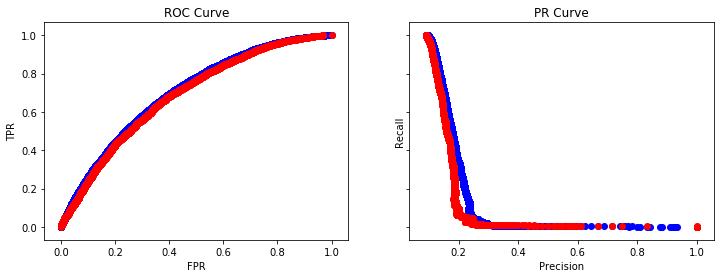

----- L1 = 0.071389, L2 = 0.002668, Dropout = 0.726270 -----
Epoch 1/30
84376/84376 [==============================] - 6s 76us/step - loss: 10.8399 - binary_accuracy: 0.6719
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.6985 - binary_accuracy: 0.6104
Epoch 3/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.7070 - binary_accuracy: 0.4277
Epoch 4/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.7108 - binary_accuracy: 0.3962
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.7109 - binary_accuracy: 0.4077
Epoch 6/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.7092 - binary_accuracy: 0.3740
Epoch 7/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.7086 - binary_accuracy: 0.3980
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.7089 - binary_accuracy: 0.4057
Epoch 9/30
84376/84376 [==================

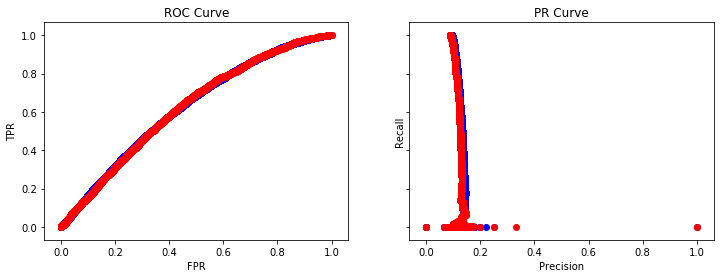

----- L1 = 0.001036, L2 = 0.037773, Dropout = 0.785621 -----
Epoch 1/30
84376/84376 [==============================] - 7s 82us/step - loss: 2.8488 - binary_accuracy: 0.5014
Epoch 2/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.9436 - binary_accuracy: 0.4812
Epoch 3/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.6439 - binary_accuracy: 0.4754
Epoch 4/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.4944 - binary_accuracy: 0.4903
Epoch 5/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.4102 - binary_accuracy: 0.5004
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3512 - binary_accuracy: 0.5071
Epoch 7/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.3196 - binary_accuracy: 0.5105
Epoch 8/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.3000 - binary_accuracy: 0.5071
Epoch 9/30
84376/84376 [===================

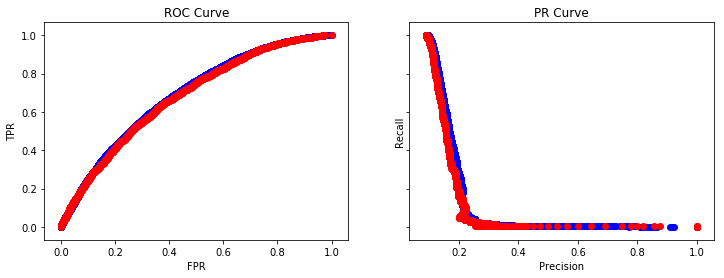

----- L1 = 0.006424, L2 = 0.005361, Dropout = 0.654328 -----
Epoch 1/30
84376/84376 [==============================] - 7s 80us/step - loss: 3.8914 - binary_accuracy: 0.5450
Epoch 2/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.8197 - binary_accuracy: 0.4994
Epoch 3/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.4636 - binary_accuracy: 0.4932
Epoch 4/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.3588 - binary_accuracy: 0.5162
Epoch 5/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.3280 - binary_accuracy: 0.5375
Epoch 6/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.3187 - binary_accuracy: 0.5589
Epoch 7/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3138 - binary_accuracy: 0.5630
Epoch 8/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.3115 - binary_accuracy: 0.5685
Epoch 9/30
84376/84376 [===================

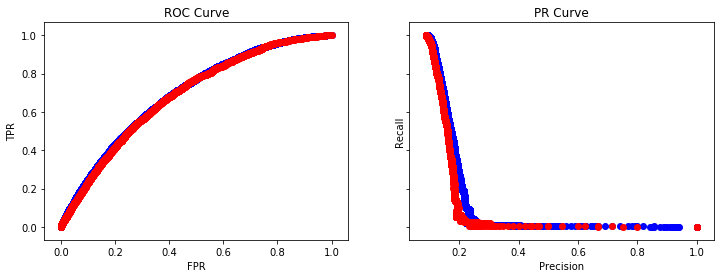

----- L1 = 0.000914, L2 = 0.002261, Dropout = 0.497645 -----
Epoch 1/30
84376/84376 [==============================] - 7s 78us/step - loss: 2.1195 - binary_accuracy: 0.5555
Epoch 2/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.7118 - binary_accuracy: 0.5547
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.5499 - binary_accuracy: 0.5605
Epoch 4/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.4540 - binary_accuracy: 0.5694
Epoch 5/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3916 - binary_accuracy: 0.5670
Epoch 6/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3493 - binary_accuracy: 0.5739
Epoch 7/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3183 - binary_accuracy: 0.5672
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.2934 - binary_accuracy: 0.5788
Epoch 9/30
84376/84376 [===================

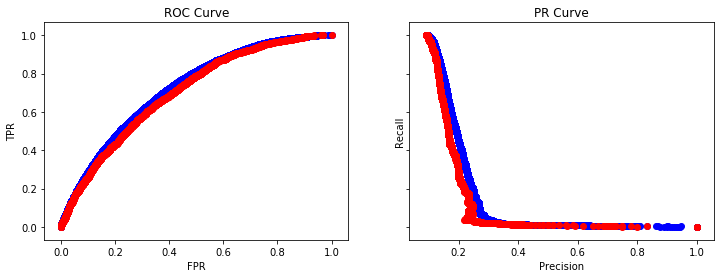

----- L1 = 0.001214, L2 = 0.004395, Dropout = 0.531095 -----
Epoch 1/30
84376/84376 [==============================] - 7s 80us/step - loss: 2.3390 - binary_accuracy: 0.5616
Epoch 2/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.7903 - binary_accuracy: 0.5467
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.5891 - binary_accuracy: 0.5562
Epoch 4/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.4722 - binary_accuracy: 0.5623
Epoch 5/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.3907 - binary_accuracy: 0.5649
Epoch 6/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.3457 - binary_accuracy: 0.5603
Epoch 7/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.3095 - binary_accuracy: 0.5697
Epoch 8/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.2855 - binary_accuracy: 0.5748
Epoch 9/30
84376/84376 [===================

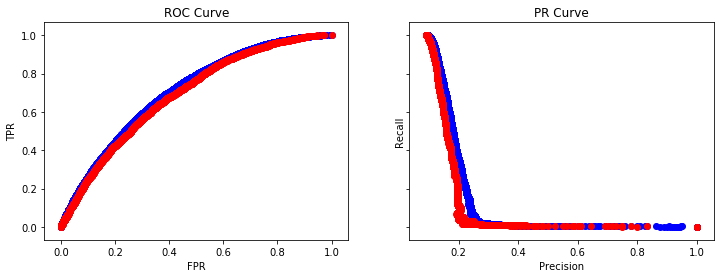

----- L1 = 0.002453, L2 = 0.008063, Dropout = 0.760571 -----
Epoch 1/30
84376/84376 [==============================] - 7s 79us/step - loss: 3.1905 - binary_accuracy: 0.5502
Epoch 2/30
84376/84376 [==============================] - 6s 68us/step - loss: 2.2022 - binary_accuracy: 0.4899
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.8540 - binary_accuracy: 0.4868
Epoch 4/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.6434 - binary_accuracy: 0.4882
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.5097 - binary_accuracy: 0.4849
Epoch 6/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.4208 - binary_accuracy: 0.4971
Epoch 7/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.3713 - binary_accuracy: 0.5000
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.3367 - binary_accuracy: 0.5105
Epoch 9/30
84376/84376 [===================

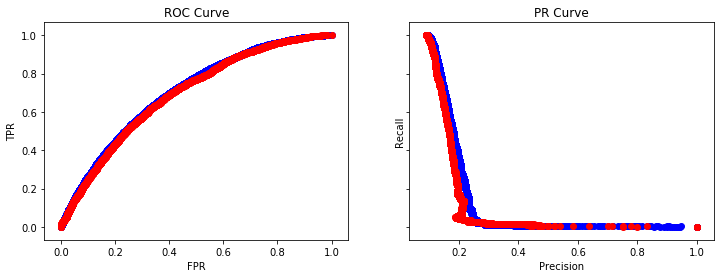

----- L1 = 0.036666, L2 = 0.007735, Dropout = 0.658172 -----
Epoch 1/30
84376/84376 [==============================] - 7s 80us/step - loss: 7.3717 - binary_accuracy: 0.5277
Epoch 2/30
84376/84376 [==============================] - 7s 82us/step - loss: 1.5068 - binary_accuracy: 0.4740
Epoch 3/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.4976 - binary_accuracy: 0.5060
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.5009 - binary_accuracy: 0.5075
Epoch 5/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.5036 - binary_accuracy: 0.5333
Epoch 6/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.5029 - binary_accuracy: 0.5416
Epoch 7/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.5040 - binary_accuracy: 0.5392
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.5033 - binary_accuracy: 0.5444
Epoch 9/30
84376/84376 [===================

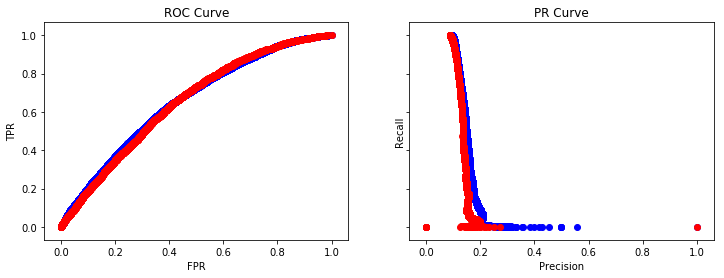

----- L1 = 0.000396, L2 = 0.001871, Dropout = 0.795865 -----
Epoch 1/30
84376/84376 [==============================] - 7s 84us/step - loss: 1.7980 - binary_accuracy: 0.5004
Epoch 2/30
84376/84376 [==============================] - 6s 77us/step - loss: 1.5946 - binary_accuracy: 0.4661
Epoch 3/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.5251 - binary_accuracy: 0.4709
Epoch 4/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.4769 - binary_accuracy: 0.4681
Epoch 5/30
84376/84376 [==============================] - 7s 85us/step - loss: 1.4341 - binary_accuracy: 0.4735
Epoch 6/30
84376/84376 [==============================] - 8s 90us/step - loss: 1.4007 - binary_accuracy: 0.4842
Epoch 7/30
84376/84376 [==============================] - 6s 77us/step - loss: 1.3767 - binary_accuracy: 0.4813
Epoch 8/30
84376/84376 [==============================] - 7s 84us/step - loss: 1.3556 - binary_accuracy: 0.4830
Epoch 9/30
84376/84376 [===================

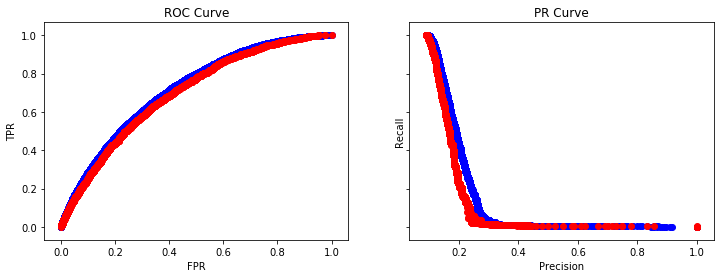

----- L1 = 0.004834, L2 = 0.001629, Dropout = 0.726522 -----
Epoch 1/30
84376/84376 [==============================] - 7s 80us/step - loss: 3.9631 - binary_accuracy: 0.5254
Epoch 2/30
84376/84376 [==============================] - 6s 72us/step - loss: 2.1947 - binary_accuracy: 0.4876
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.7303 - binary_accuracy: 0.4910
Epoch 4/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.5097 - binary_accuracy: 0.4943
Epoch 5/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.4047 - binary_accuracy: 0.5009
Epoch 6/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3578 - binary_accuracy: 0.5204: 1s - lo
Epoch 7/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.3342 - binary_accuracy: 0.5354
Epoch 8/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3214 - binary_accuracy: 0.5384
Epoch 9/30
84376/84376 [==========

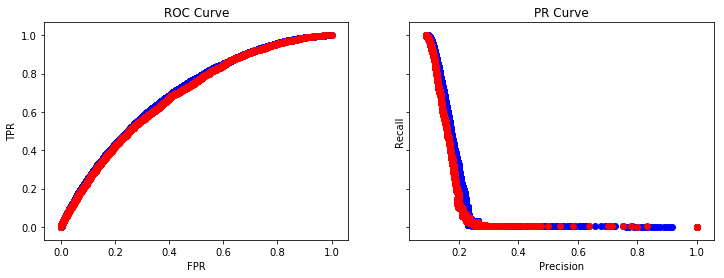

----- L1 = 0.000791, L2 = 0.008372, Dropout = 0.598732 -----
Epoch 1/30
84376/84376 [==============================] - 7s 84us/step - loss: 2.0732 - binary_accuracy: 0.5456
Epoch 2/30
84376/84376 [==============================] - 7s 79us/step - loss: 1.6452 - binary_accuracy: 0.5386
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.4988 - binary_accuracy: 0.5278
Epoch 4/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.4131 - binary_accuracy: 0.5411
Epoch 5/30
84376/84376 [==============================] - 7s 80us/step - loss: 1.3606 - binary_accuracy: 0.5401: 0s - loss: 1.3611 - binary_accuracy: 0.5
Epoch 6/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.3226 - binary_accuracy: 0.5549
Epoch 7/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.3002 - binary_accuracy: 0.5527
Epoch 8/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.2788 - binary_accuracy: 0.5571
E

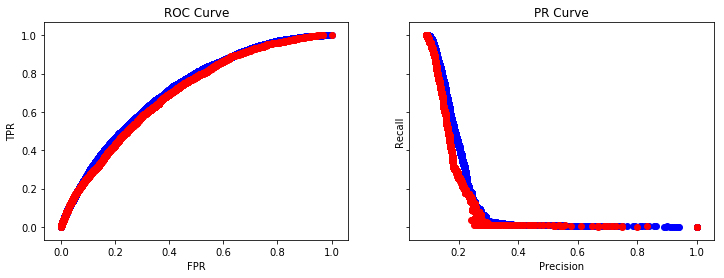

----- L1 = 0.000179, L2 = 0.020563, Dropout = 0.714755 -----
Epoch 1/30
84376/84376 [==============================] - 7s 84us/step - loss: 1.9855 - binary_accuracy: 0.5458
Epoch 2/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.6032 - binary_accuracy: 0.5335
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.4757 - binary_accuracy: 0.5418
Epoch 4/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3955 - binary_accuracy: 0.5675
Epoch 5/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.3432 - binary_accuracy: 0.5619
Epoch 6/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3081 - binary_accuracy: 0.5706
Epoch 7/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2850 - binary_accuracy: 0.5776
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.2644 - binary_accuracy: 0.5728
Epoch 9/30
84376/84376 [===================

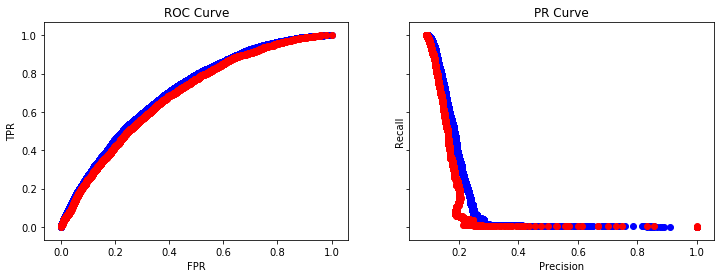

----- L1 = 0.001689, L2 = 0.002420, Dropout = 0.784909 -----
Epoch 1/30
84376/84376 [==============================] - 7s 80us/step - loss: 2.7483 - binary_accuracy: 0.5161
Epoch 2/30
84376/84376 [==============================] - 6s 68us/step - loss: 2.0991 - binary_accuracy: 0.4629
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.8283 - binary_accuracy: 0.4562
Epoch 4/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.6607 - binary_accuracy: 0.4625
Epoch 5/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.5524 - binary_accuracy: 0.5032
Epoch 6/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.4704 - binary_accuracy: 0.5539
Epoch 7/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.4167 - binary_accuracy: 0.5509
Epoch 8/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.3754 - binary_accuracy: 0.5642
Epoch 9/30
84376/84376 [===================

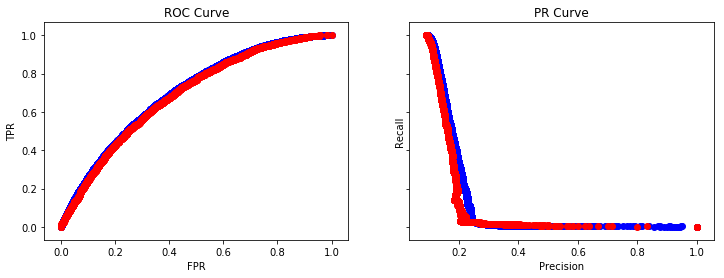

----- L1 = 0.006996, L2 = 0.009527, Dropout = 0.503546 -----
Epoch 1/30
84376/84376 [==============================] - 7s 84us/step - loss: 3.9593 - binary_accuracy: 0.5397
Epoch 2/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.6814 - binary_accuracy: 0.5494
Epoch 3/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.3895 - binary_accuracy: 0.5533
Epoch 4/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3332 - binary_accuracy: 0.5652
Epoch 5/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.3172 - binary_accuracy: 0.5748
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3091 - binary_accuracy: 0.5758
Epoch 7/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.3055 - binary_accuracy: 0.5821
Epoch 8/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.3020 - binary_accuracy: 0.5804
Epoch 9/30
84376/84376 [===================

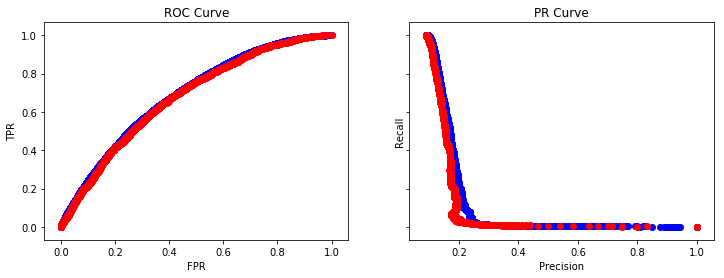

----- L1 = 0.015559, L2 = 0.114457, Dropout = 0.702189 -----
Epoch 1/30
84376/84376 [==============================] - 7s 81us/step - loss: 5.6591 - binary_accuracy: 0.5239
Epoch 2/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.4919 - binary_accuracy: 0.5642
Epoch 3/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3962 - binary_accuracy: 0.5575
Epoch 4/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.3830 - binary_accuracy: 0.5655
Epoch 5/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3852 - binary_accuracy: 0.5743
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3833 - binary_accuracy: 0.5709
Epoch 7/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3887 - binary_accuracy: 0.5717
Epoch 8/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.3874 - binary_accuracy: 0.5702
Epoch 9/30
84376/84376 [===================

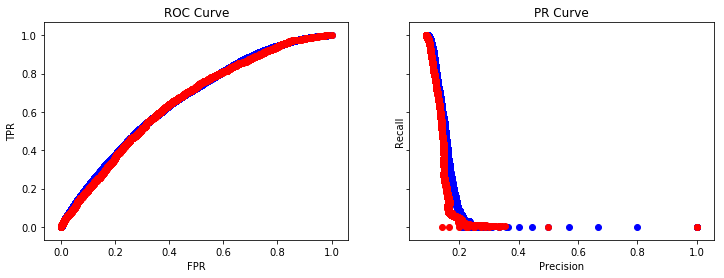

----- L1 = 0.000699, L2 = 0.017311, Dropout = 0.759106 -----
Epoch 1/30
84376/84376 [==============================] - 7s 87us/step - loss: 2.3163 - binary_accuracy: 0.5365
Epoch 2/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.8184 - binary_accuracy: 0.4941
Epoch 3/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.6224 - binary_accuracy: 0.4936
Epoch 4/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.5065 - binary_accuracy: 0.4939
Epoch 5/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.4294 - binary_accuracy: 0.5042
Epoch 6/30
84376/84376 [==============================] - 6s 77us/step - loss: 1.3822 - binary_accuracy: 0.5079
Epoch 7/30
84376/84376 [==============================] - 7s 80us/step - loss: 1.3395 - binary_accuracy: 0.5032
Epoch 8/30
84376/84376 [==============================] - 7s 79us/step - loss: 1.3154 - binary_accuracy: 0.5249
Epoch 9/30
84376/84376 [===================

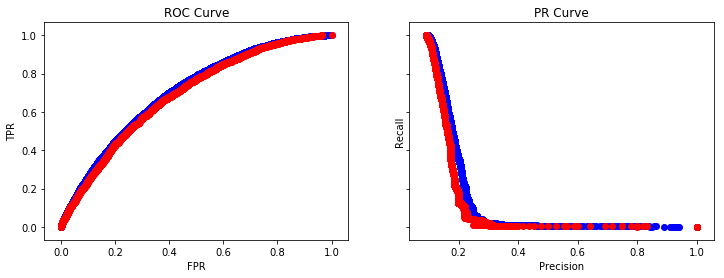

----- L1 = 0.025437, L2 = 0.001895, Dropout = 0.746673 -----
Epoch 1/30
84376/84376 [==============================] - 7s 88us/step - loss: 7.0394 - binary_accuracy: 0.4868
Epoch 2/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.5991 - binary_accuracy: 0.3952
Epoch 3/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.4750 - binary_accuracy: 0.4730
Epoch 4/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.4601 - binary_accuracy: 0.5015
Epoch 5/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.4541 - binary_accuracy: 0.5173
Epoch 6/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.4546 - binary_accuracy: 0.5212
Epoch 7/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.4526 - binary_accuracy: 0.5250
Epoch 8/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.4524 - binary_accuracy: 0.5359
Epoch 9/30
84376/84376 [===================

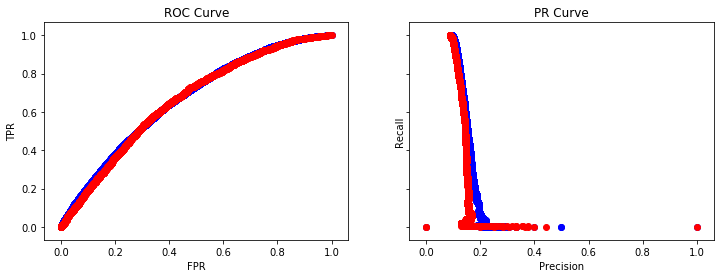

----- L1 = 0.010340, L2 = 0.002084, Dropout = 0.684196 -----
Epoch 1/30
84376/84376 [==============================] - 8s 90us/step - loss: 4.5576 - binary_accuracy: 0.5351
Epoch 2/30
84376/84376 [==============================] - 7s 78us/step - loss: 1.7105 - binary_accuracy: 0.4716
Epoch 3/30
84376/84376 [==============================] - 7s 82us/step - loss: 1.4165 - binary_accuracy: 0.4838
Epoch 4/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.3631 - binary_accuracy: 0.5191
Epoch 5/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.3518 - binary_accuracy: 0.5391
Epoch 6/30
84376/84376 [==============================] - 7s 77us/step - loss: 1.3450 - binary_accuracy: 0.5438
Epoch 7/30
84376/84376 [==============================] - 7s 81us/step - loss: 1.3470 - binary_accuracy: 0.5574
Epoch 8/30
84376/84376 [==============================] - 7s 83us/step - loss: 1.3440 - binary_accuracy: 0.5563
Epoch 9/30
84376/84376 [===================

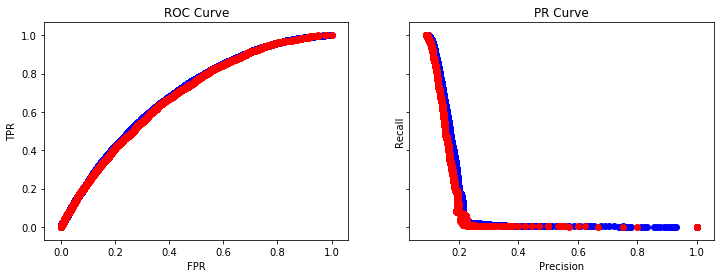

----- L1 = 0.051417, L2 = 0.559787, Dropout = 0.540474 -----
Epoch 1/30
84376/84376 [==============================] - 7s 85us/step - loss: 10.1512 - binary_accuracy: 0.3754
Epoch 2/30
84376/84376 [==============================] - 7s 78us/step - loss: 1.5745 - binary_accuracy: 0.4072
Epoch 3/30
84376/84376 [==============================] - 6s 74us/step - loss: 1.5926 - binary_accuracy: 0.4563
Epoch 4/30
84376/84376 [==============================] - 7s 77us/step - loss: 1.5972 - binary_accuracy: 0.4765
Epoch 5/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.5978 - binary_accuracy: 0.4996
Epoch 6/30
84376/84376 [==============================] - 6s 77us/step - loss: 1.5989 - binary_accuracy: 0.5298
Epoch 7/30
84376/84376 [==============================] - 6s 75us/step - loss: 1.5999 - binary_accuracy: 0.5277
Epoch 8/30
84376/84376 [==============================] - 7s 79us/step - loss: 1.5959 - binary_accuracy: 0.5252
Epoch 9/30
84376/84376 [==================

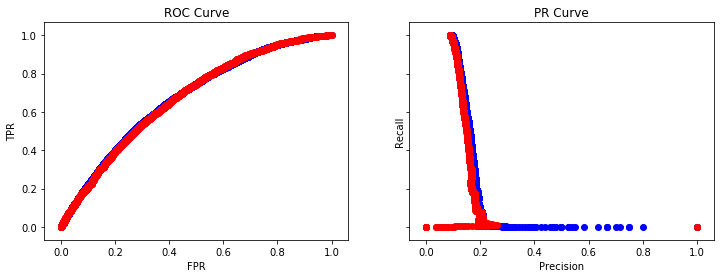

In [19]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for i in range(0, 20):
    l1 = 10**((np.random.rand()*-3)-1) # [0.0001, 0.1]
    l2 = 10**((np.random.rand()*-3)) # [0.001, 1]
    D = np.random.rand()*0.4+0.4 # [0.4, 0.8]
    print('----- L1 = %f, L2 = %f, Dropout = %f -----' % (l1, l2, D))

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=l1, l2=l2))(inputs)
    x = Dropout(D)(x)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

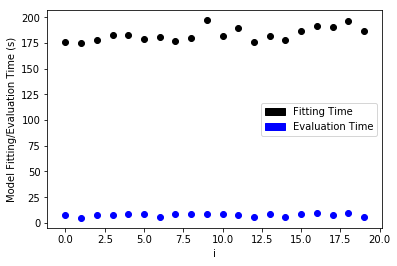

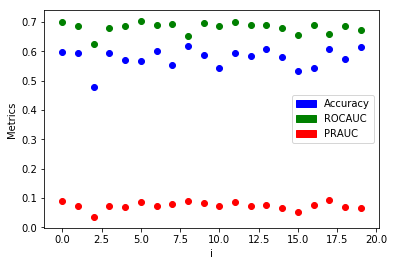

    0_i  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     0    0.597914  0.700529  0.089931  175.639490     7.436432
1     1    0.593363  0.687366  0.071924  174.917171     5.136585
2     2    0.477127  0.623773  0.036142  177.794558     7.731807
3     3    0.594169  0.680178  0.072908  182.842591     7.906291
4     4    0.569329  0.687272  0.070817  182.404711     8.197199
5     5    0.567338  0.703715  0.086670  179.463742     8.544282
6     6    0.600806  0.691214  0.074089  180.894809     5.412497
7     7    0.554255  0.693909  0.078780  176.684294     8.214161
8     8    0.619673  0.651880  0.091101  180.396368     8.462295
9     9    0.587580  0.698045  0.083298  197.237815     9.023572
10   10    0.543209  0.686568  0.073364  181.536648     8.228180
11   11    0.595023  0.700549  0.086128  189.369655     7.967236
12   12    0.583124  0.690336  0.073542  176.504318     5.824376
13   13    0.607395  0.690273  0.075372  181.821827     8.658942
14   14    0.580374  0.67

In [21]:
utils.plot_metrics(range(0, 20), 'i', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best ROCAUC obtained is 0.704, with __L1__ = 0.000914, __L2__ = 0.002261, and __Dropout__ = 0.497645.